In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [458]:
df = pd.read_csv('winequality.csv')

In [413]:
df.shape

(1599, 12)

In [414]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [415]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [416]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [417]:
df.isnull().values.any()

False

# EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

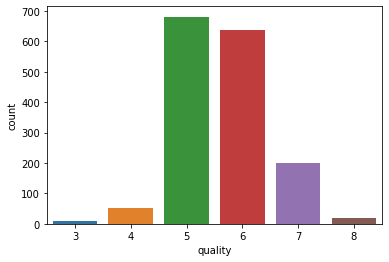

In [353]:
sns.countplot(df['quality'])

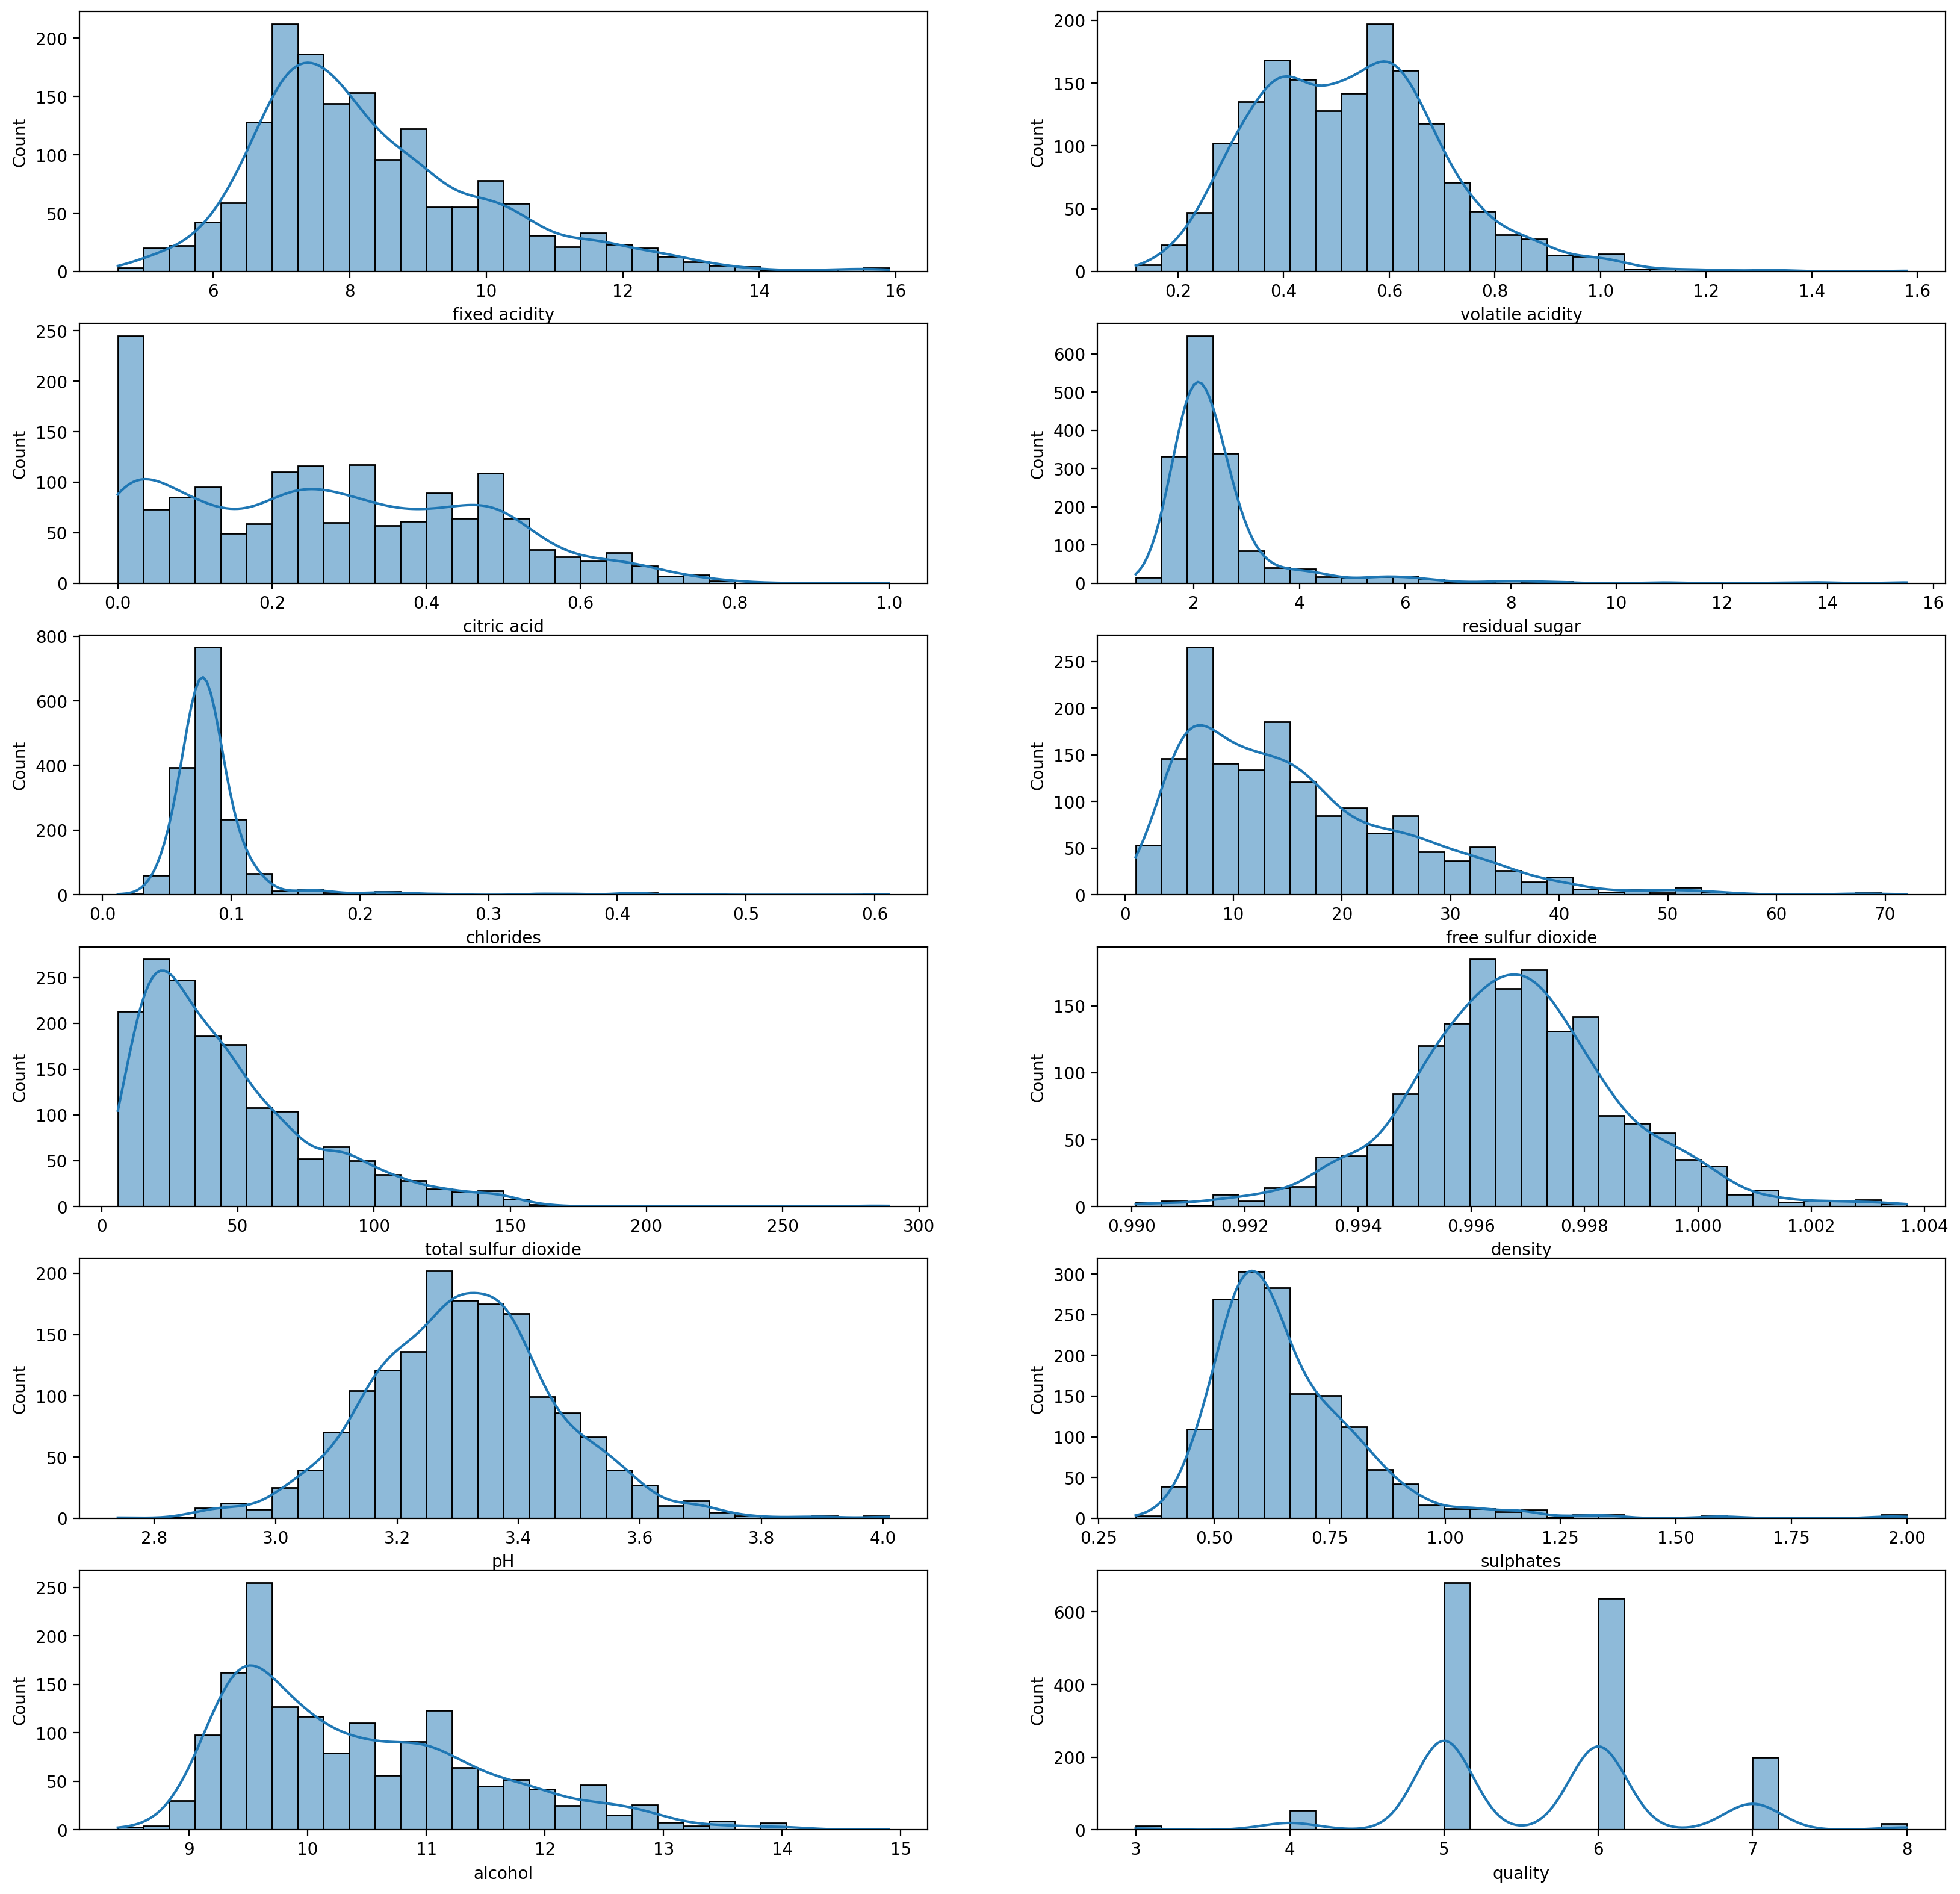

In [354]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.histplot(df[col], kde=True, bins=30)

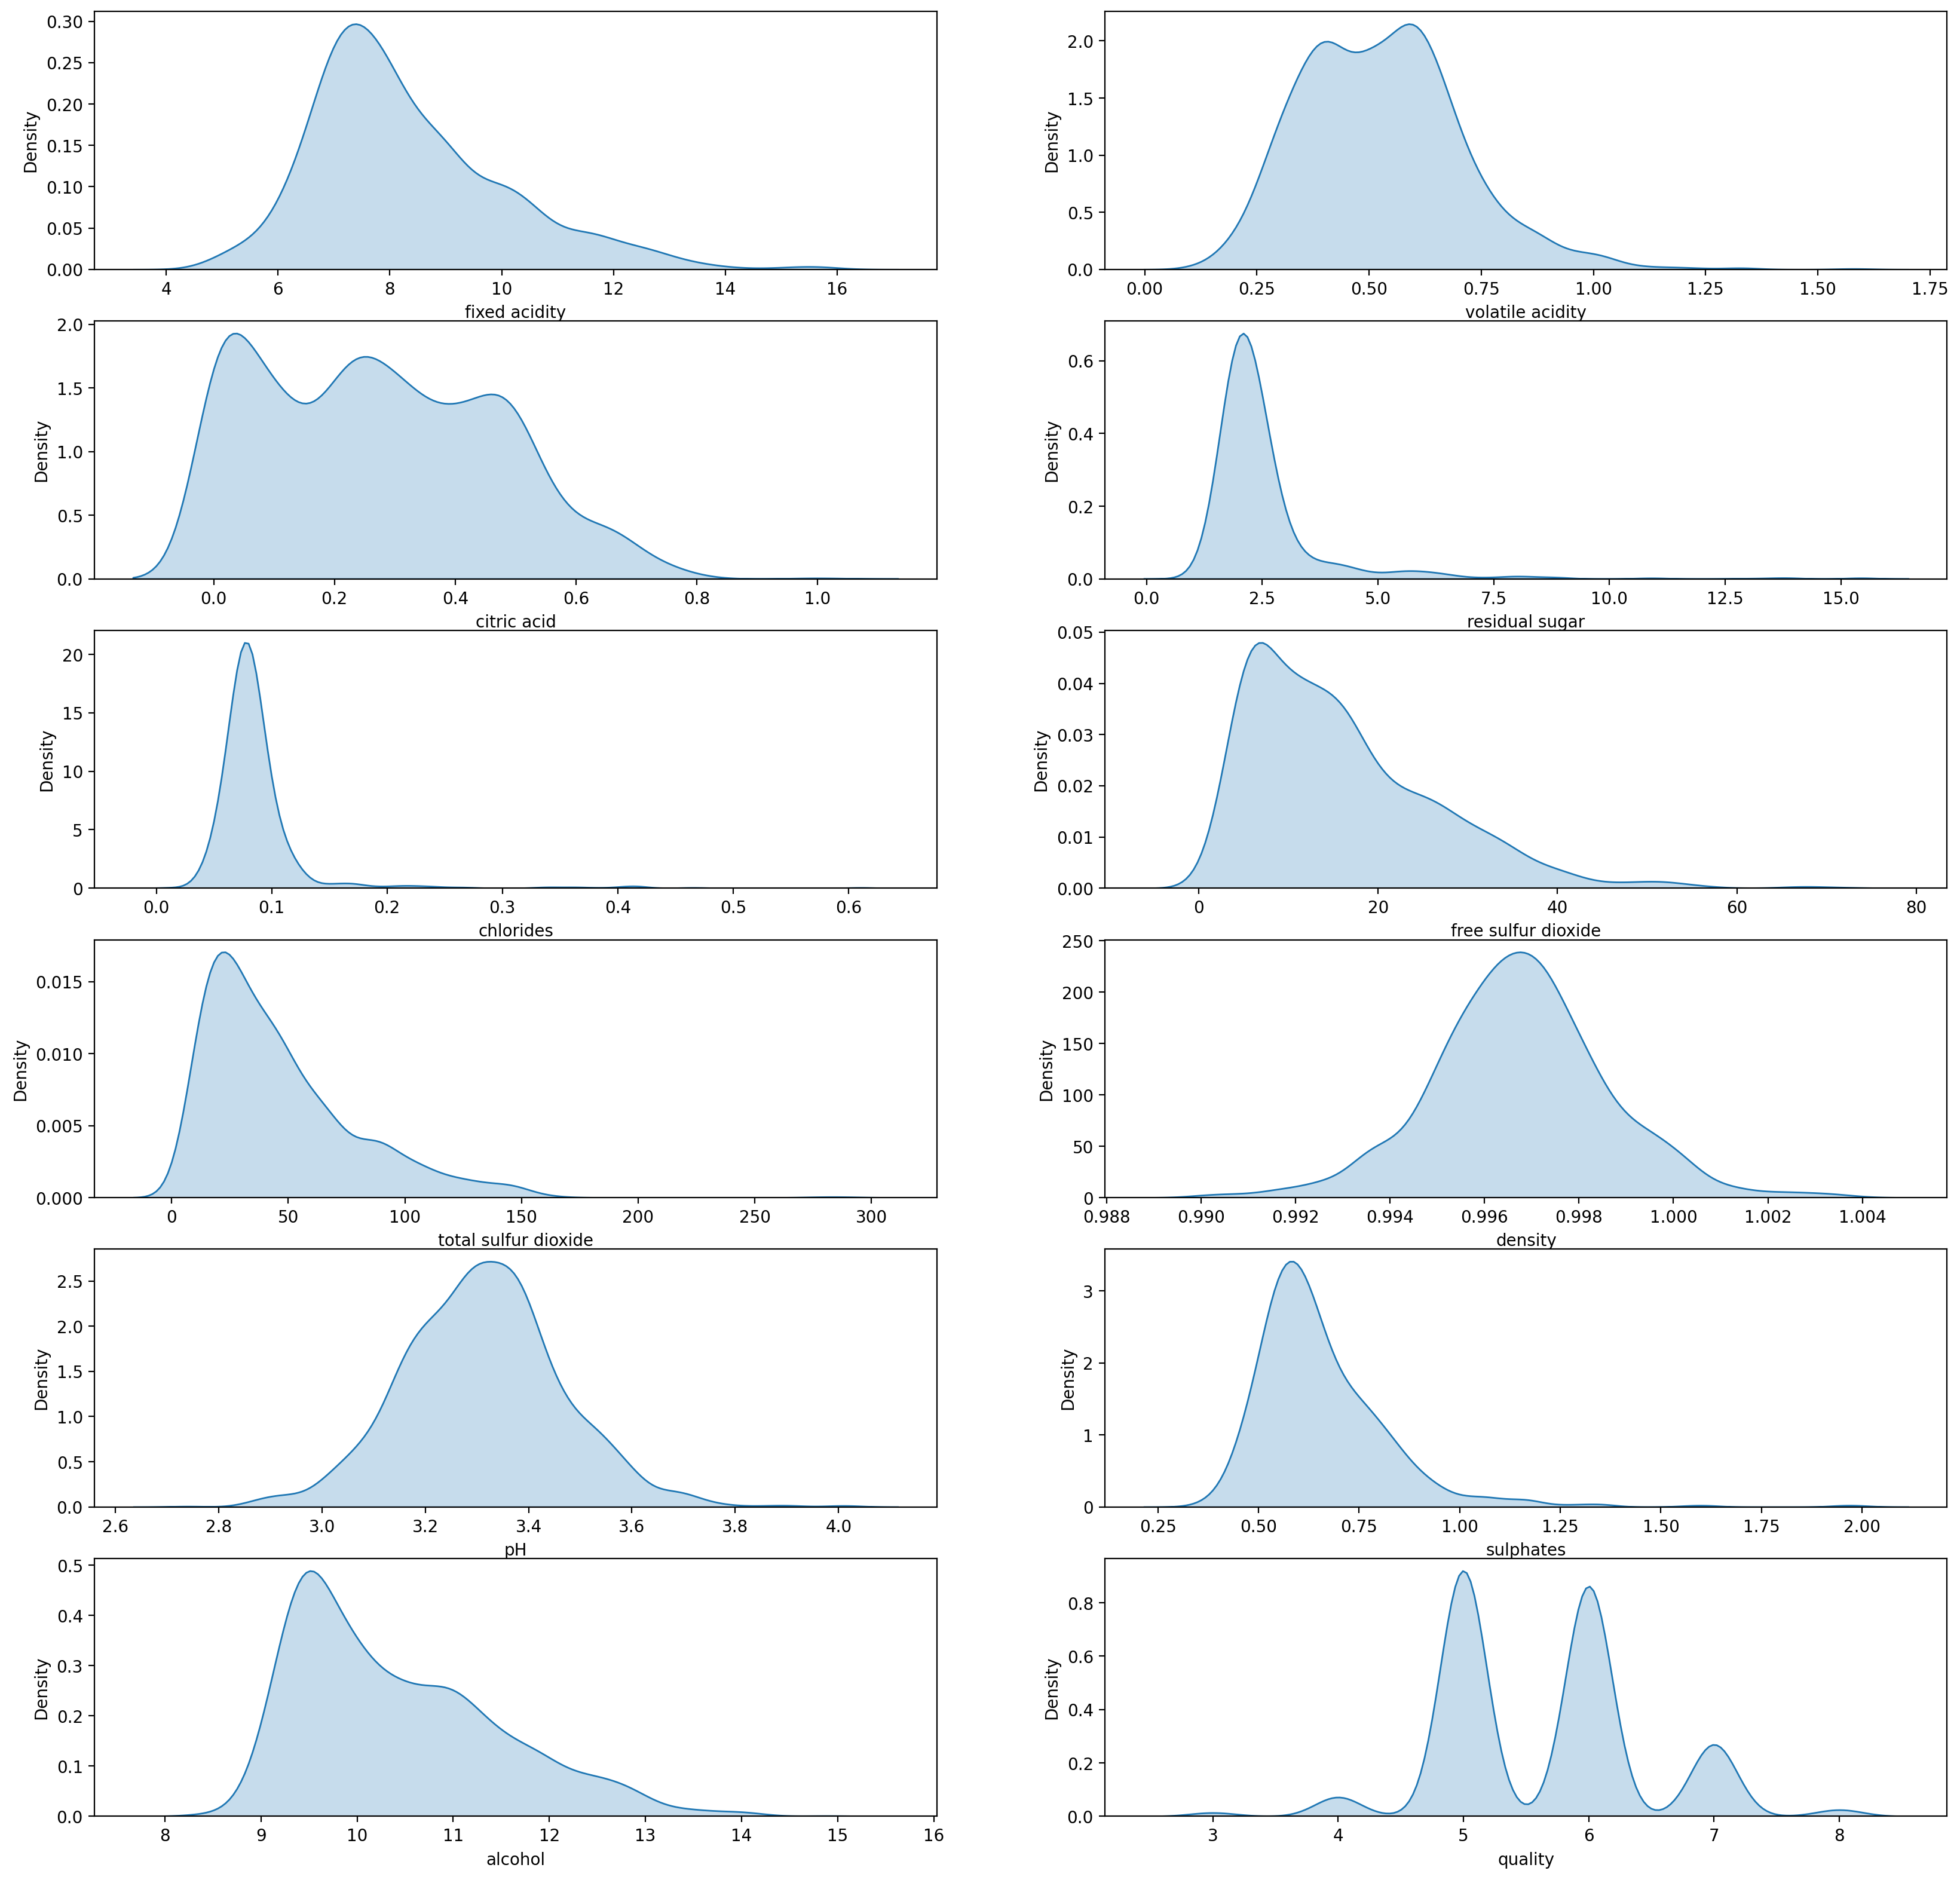

In [355]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.kdeplot(x=df[col], shade=True)

In [356]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From here we can see that the values

>+1 are positively skewed<br>
<-1 are negatively skewed<br>
0.5<x<1 are moderately positively skewed<br>
-0.5<x<1 are negatively positively skewed<br>
-0.5<x<0.5 are normal distribution<br>

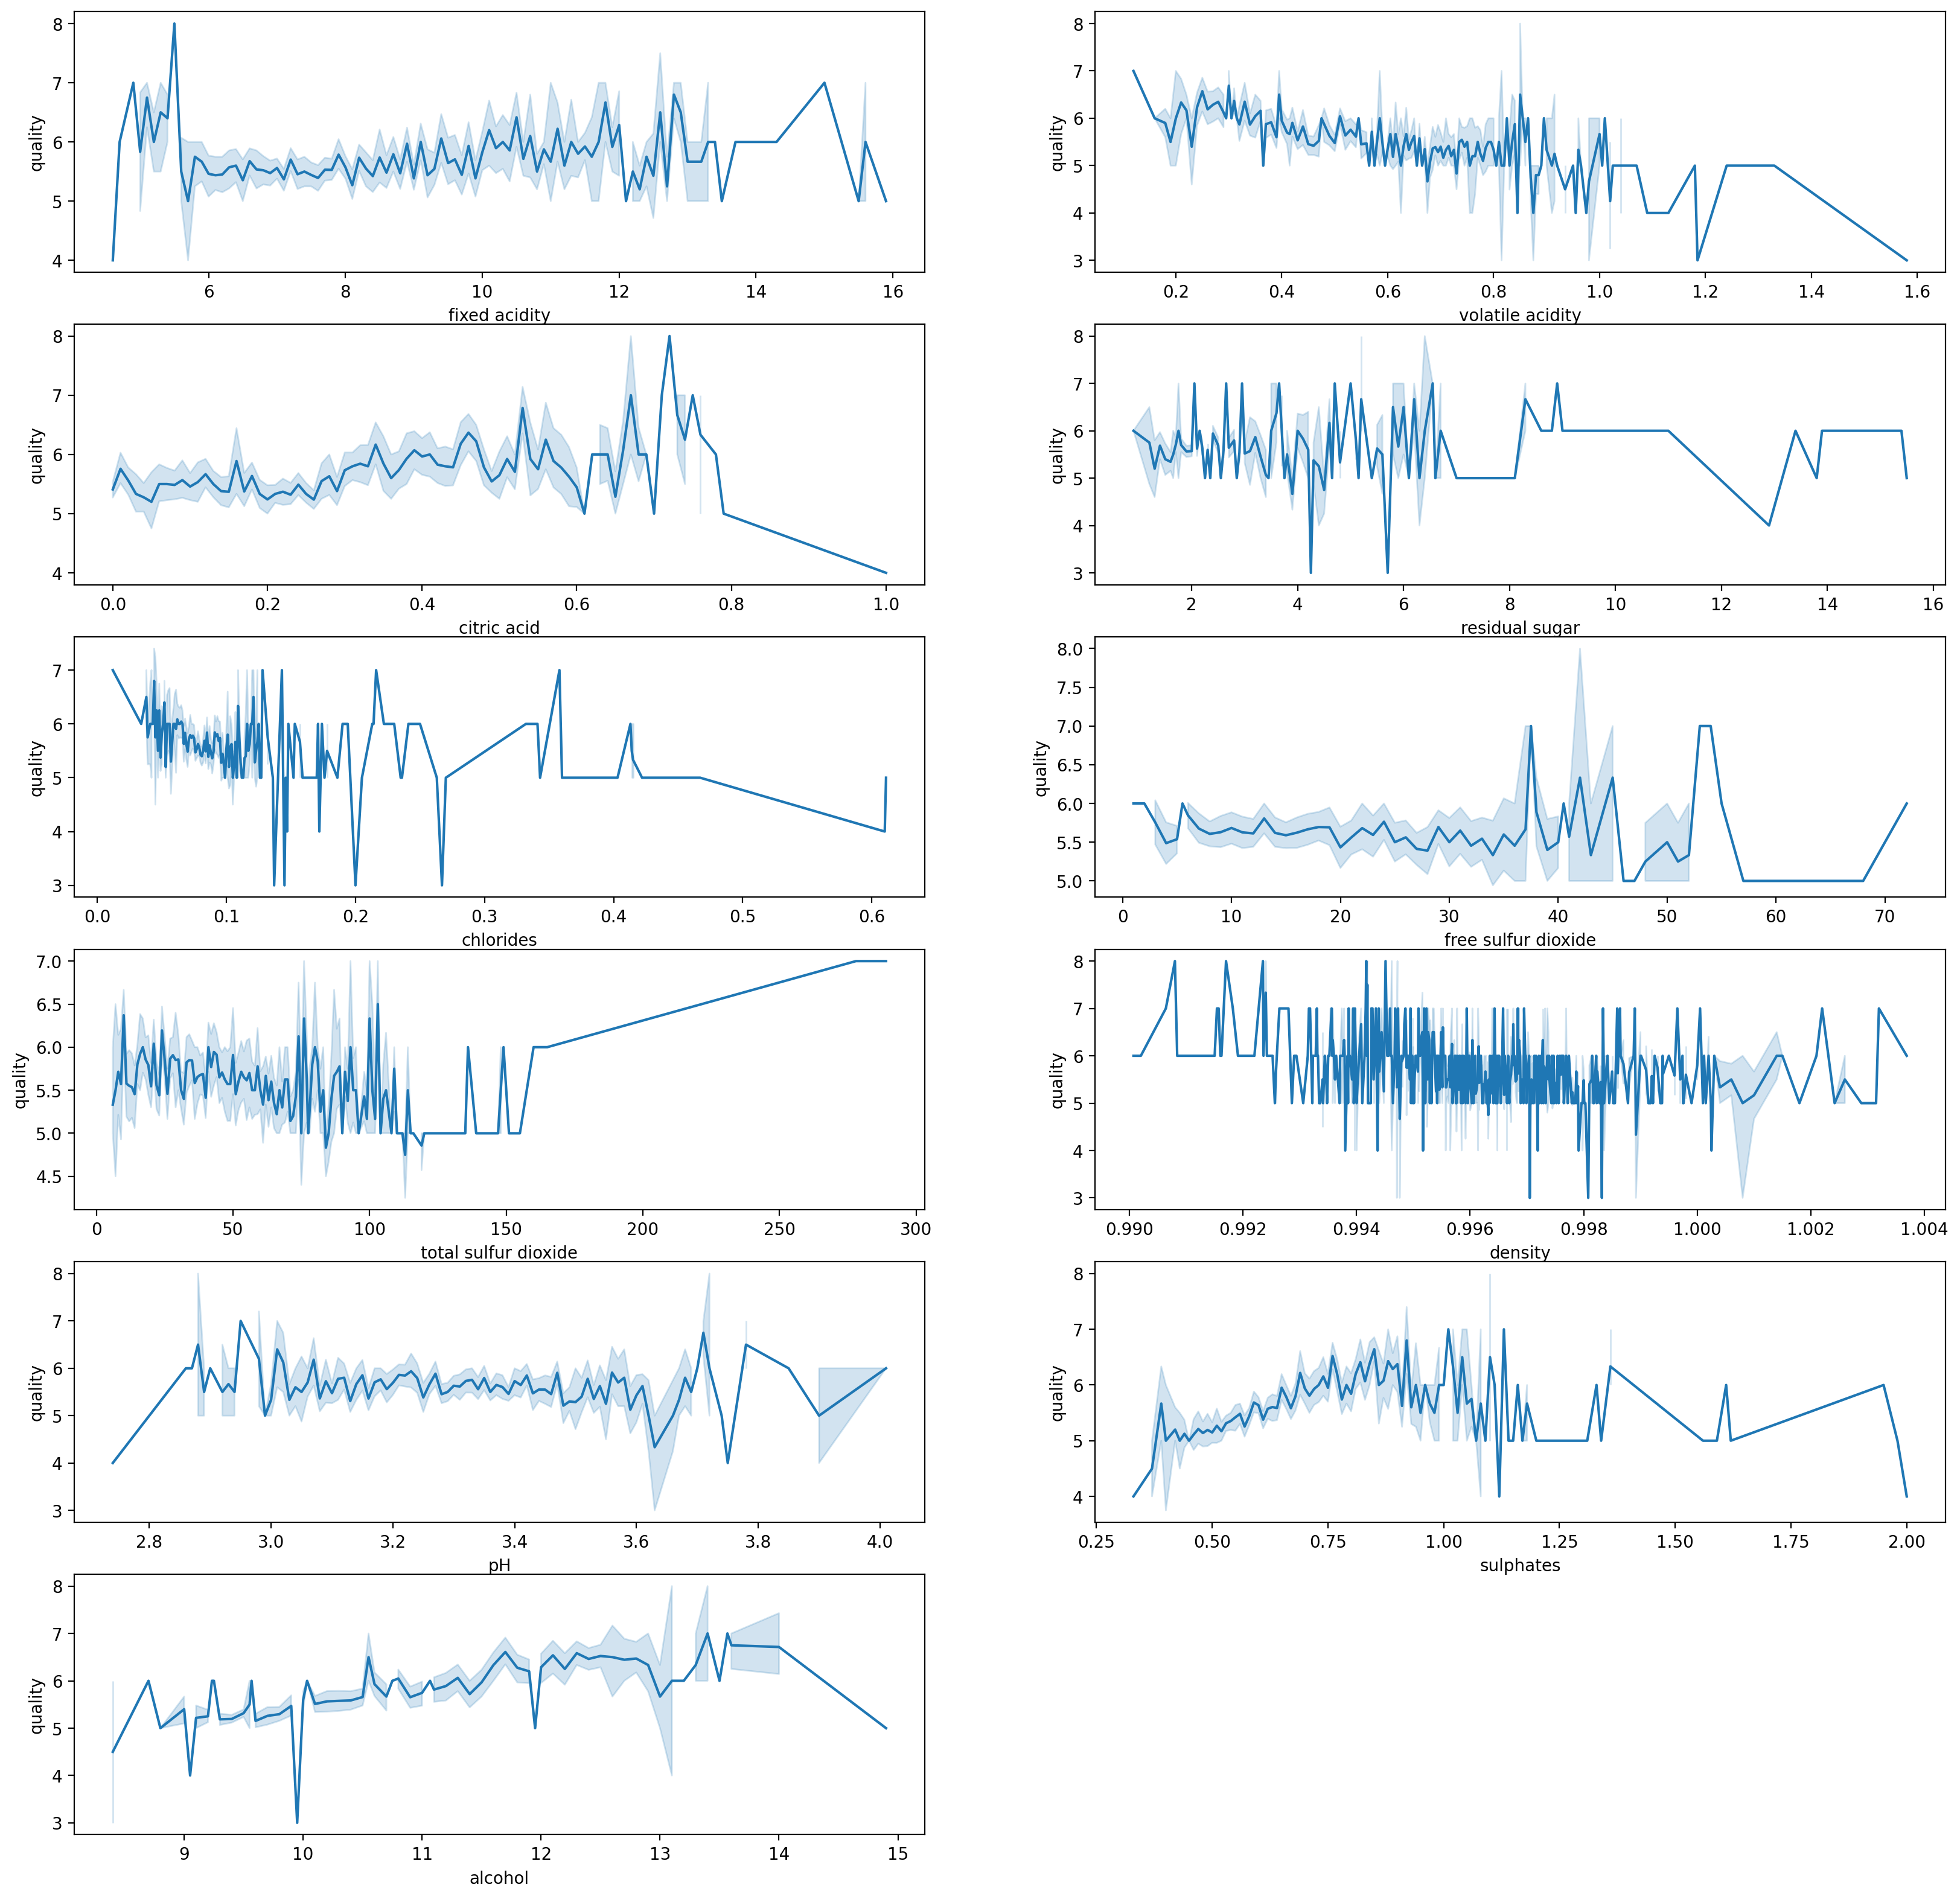

In [357]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns[:-1]:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    plt.ylabel('quality')
    sns.lineplot(x=df[col], y=df.quality, err_style='band')

In [358]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.boxplot(x=df[col])

In [359]:
plt.figure(figsize=(15,15) ,dpi=300)
sns.heatmap(data=df[:-1].corr(), cmap=plt.cm.hot_r, annot=True)

<AxesSubplot:>

# Handling Outliers

In [459]:
def handling_outlier(dataframe, feature):
    mean = dataframe[feature].mean()
    std = dataframe[feature].std()
    quantile_1, quantile_3 = np.quantile(dataframe[feature], [0.25,0.75])
    IQR = quantile_3 - quantile_1
    lower_bound = quantile_1 - (1.5*IQR)
    upper_bound = quantile_3 + (1.5*IQR)
    dataframe.loc[dataframe[dataframe[feature]<lower_bound].index, feature] = lower_bound
    dataframe.loc[dataframe[dataframe[feature]>upper_bound].index, feature] = upper_bound

In [460]:
for col in df.columns[:-1]:
    handling_outlier(df, col)

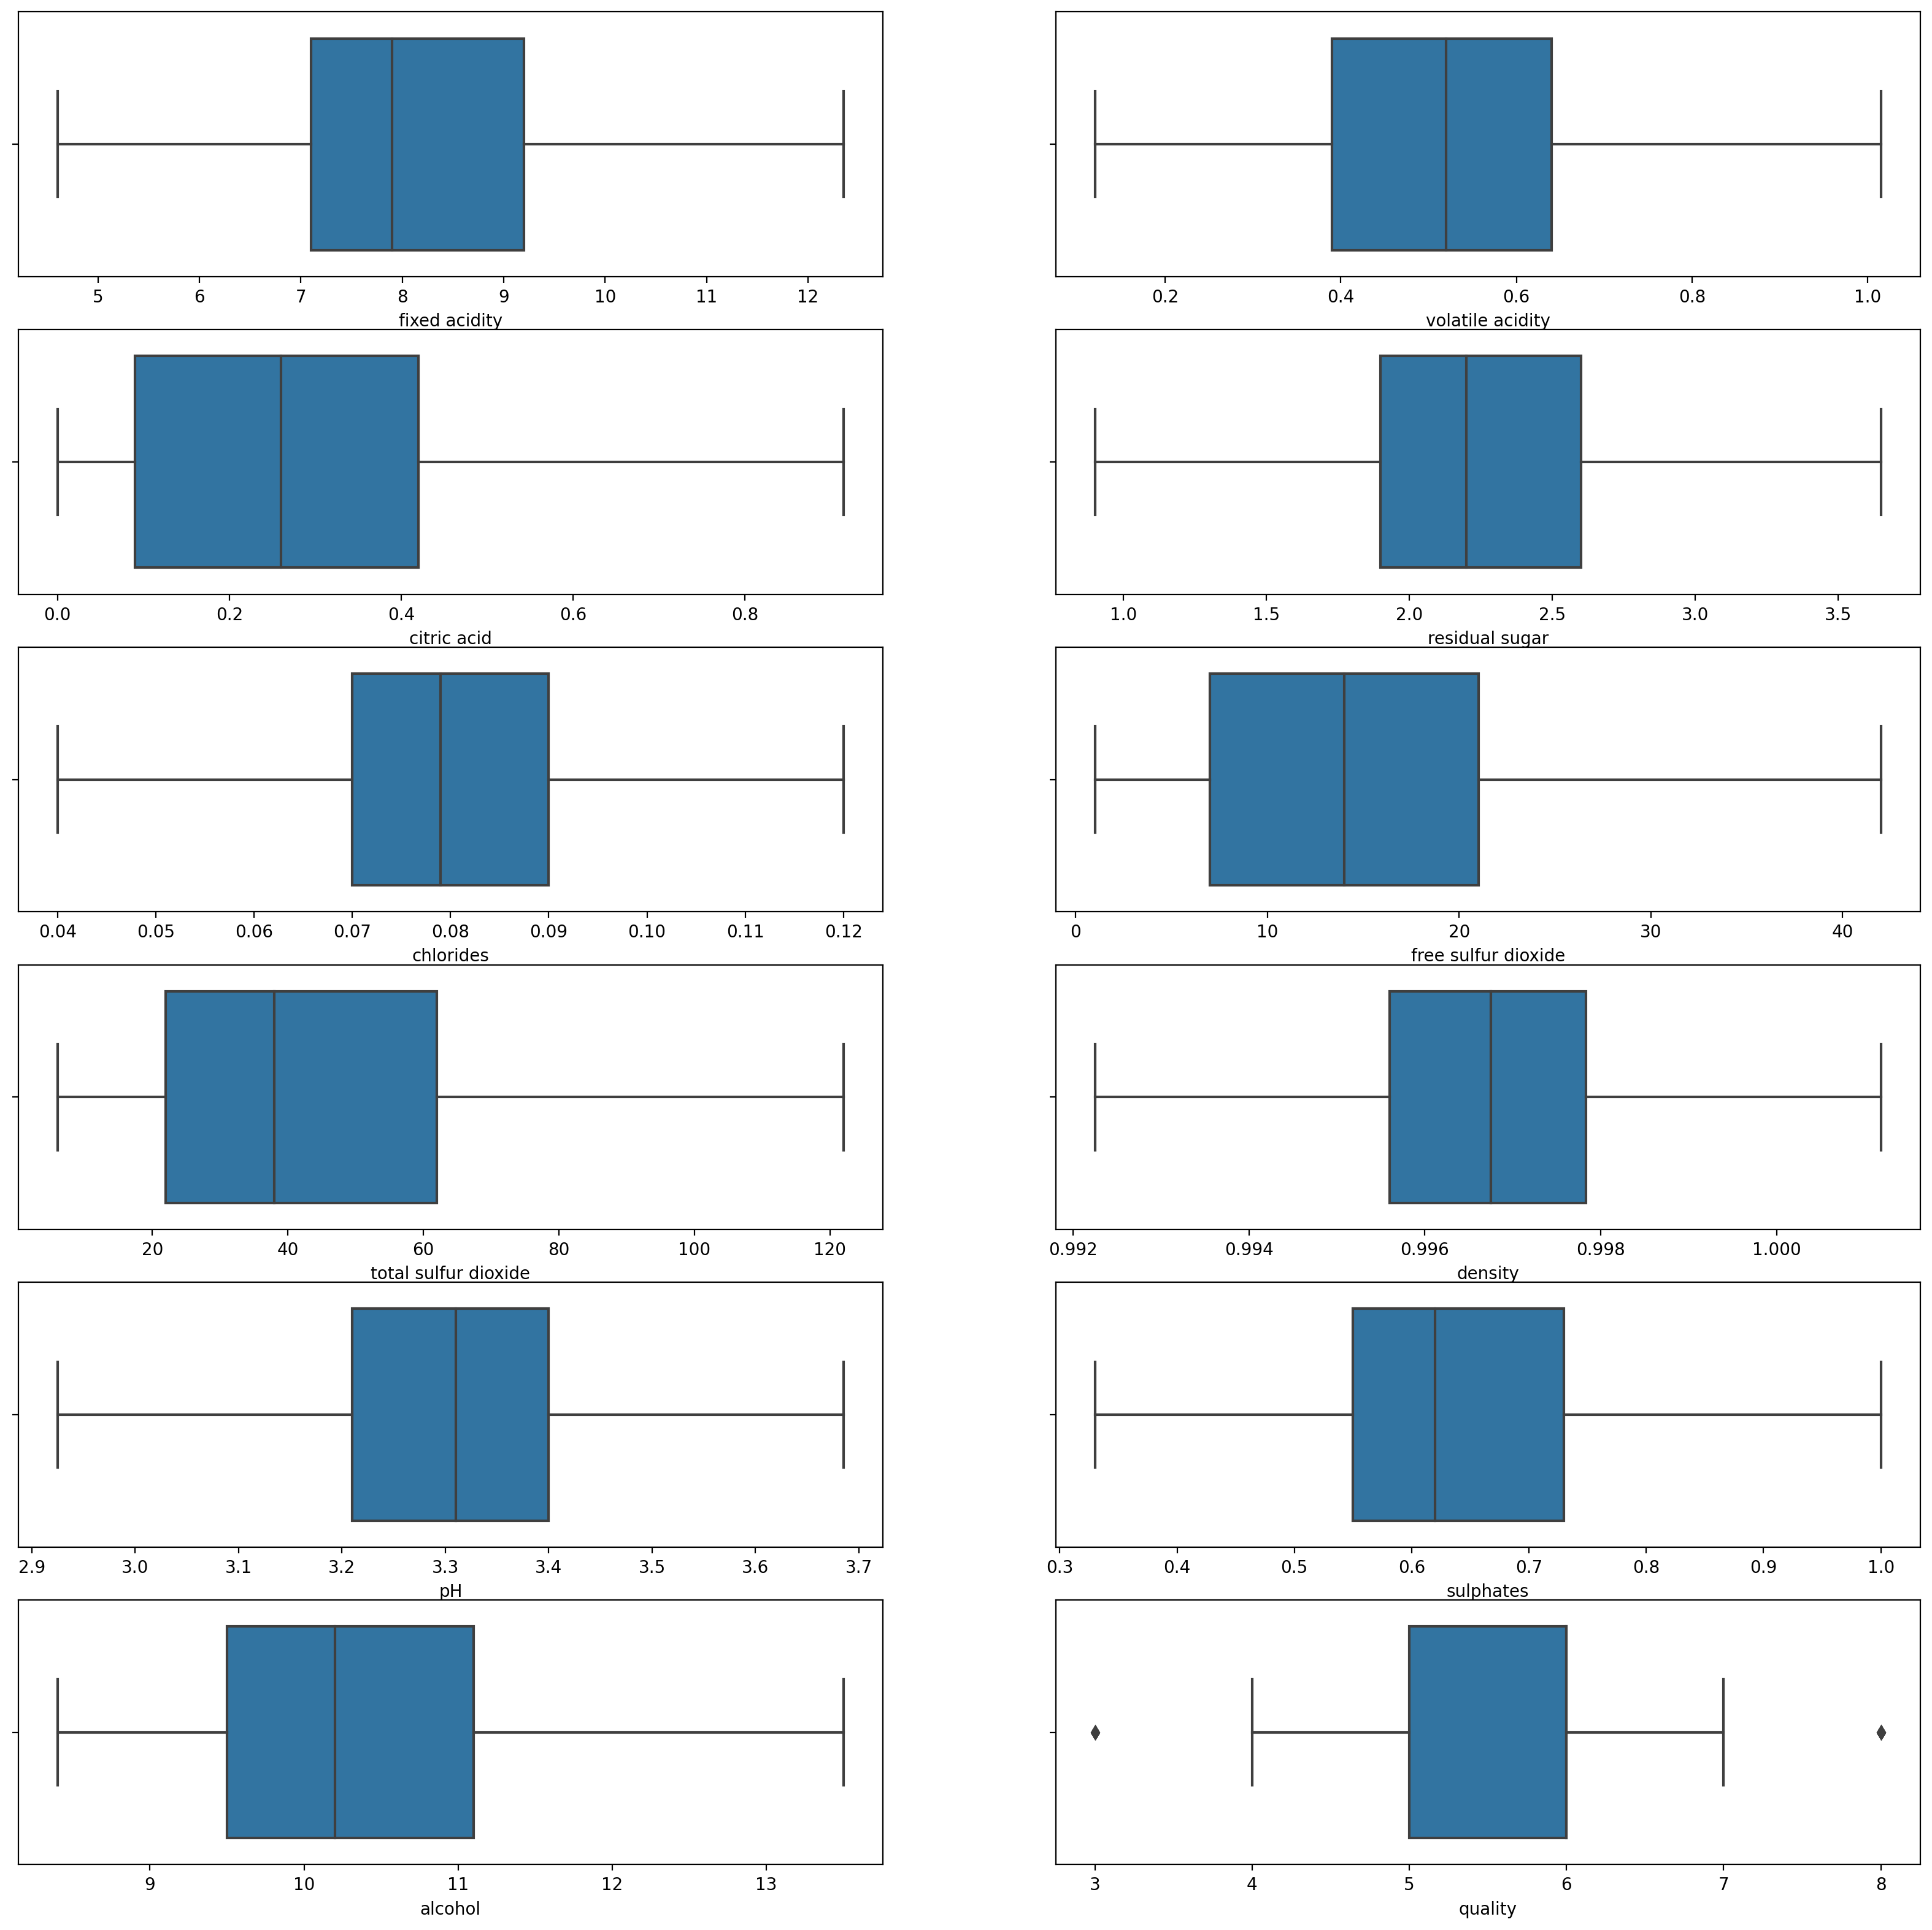

In [461]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.boxplot(x=df[col])

In [363]:
df.skew()

fixed acidity           0.700363
volatile acidity        0.420928
citric acid             0.309850
residual sugar          0.856682
chlorides               0.431683
free sulfur dioxide     0.858967
total sulfur dioxide    0.972642
density                 0.025021
pH                      0.054017
sulphates               0.782787
alcohol                 0.795429
quality                 0.217802
dtype: float64

# Gaussian Transformation

In [462]:
for col in df.columns[:-1]:
    df[col], _ = stats.boxcox(df[col]+1)

In [463]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.142552          0.471380     0.000000        0.641478   0.055275   
1       1.153779          0.548633     0.000000        0.704848   0.065600   
2       1.153779          0.498405     0.038981        0.681060   0.062970   
3       1.223609          0.233489     0.415107        0.641478   0.054758   
4       1.142552          0.471380     0.000000        0.641478   0.055275   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.918184              4.091326  0.125647  2.208906   0.246211   
1             4.029100              4.988125  0.125645  2.064731   0.263848   
2             3.318929              4.696616  0.125645  2.093057   0.259912   
3             3.487242              4.838275  0.125647  2.045729   0.249527   
4             2.918184              4.091326  0.125647  2.208906   0.246211   

    alcohol  quality  
0  0.274204        5  
1  0.274211        5  
2  0.274211        5  
3  0.274211        6  
4  0.274204        5

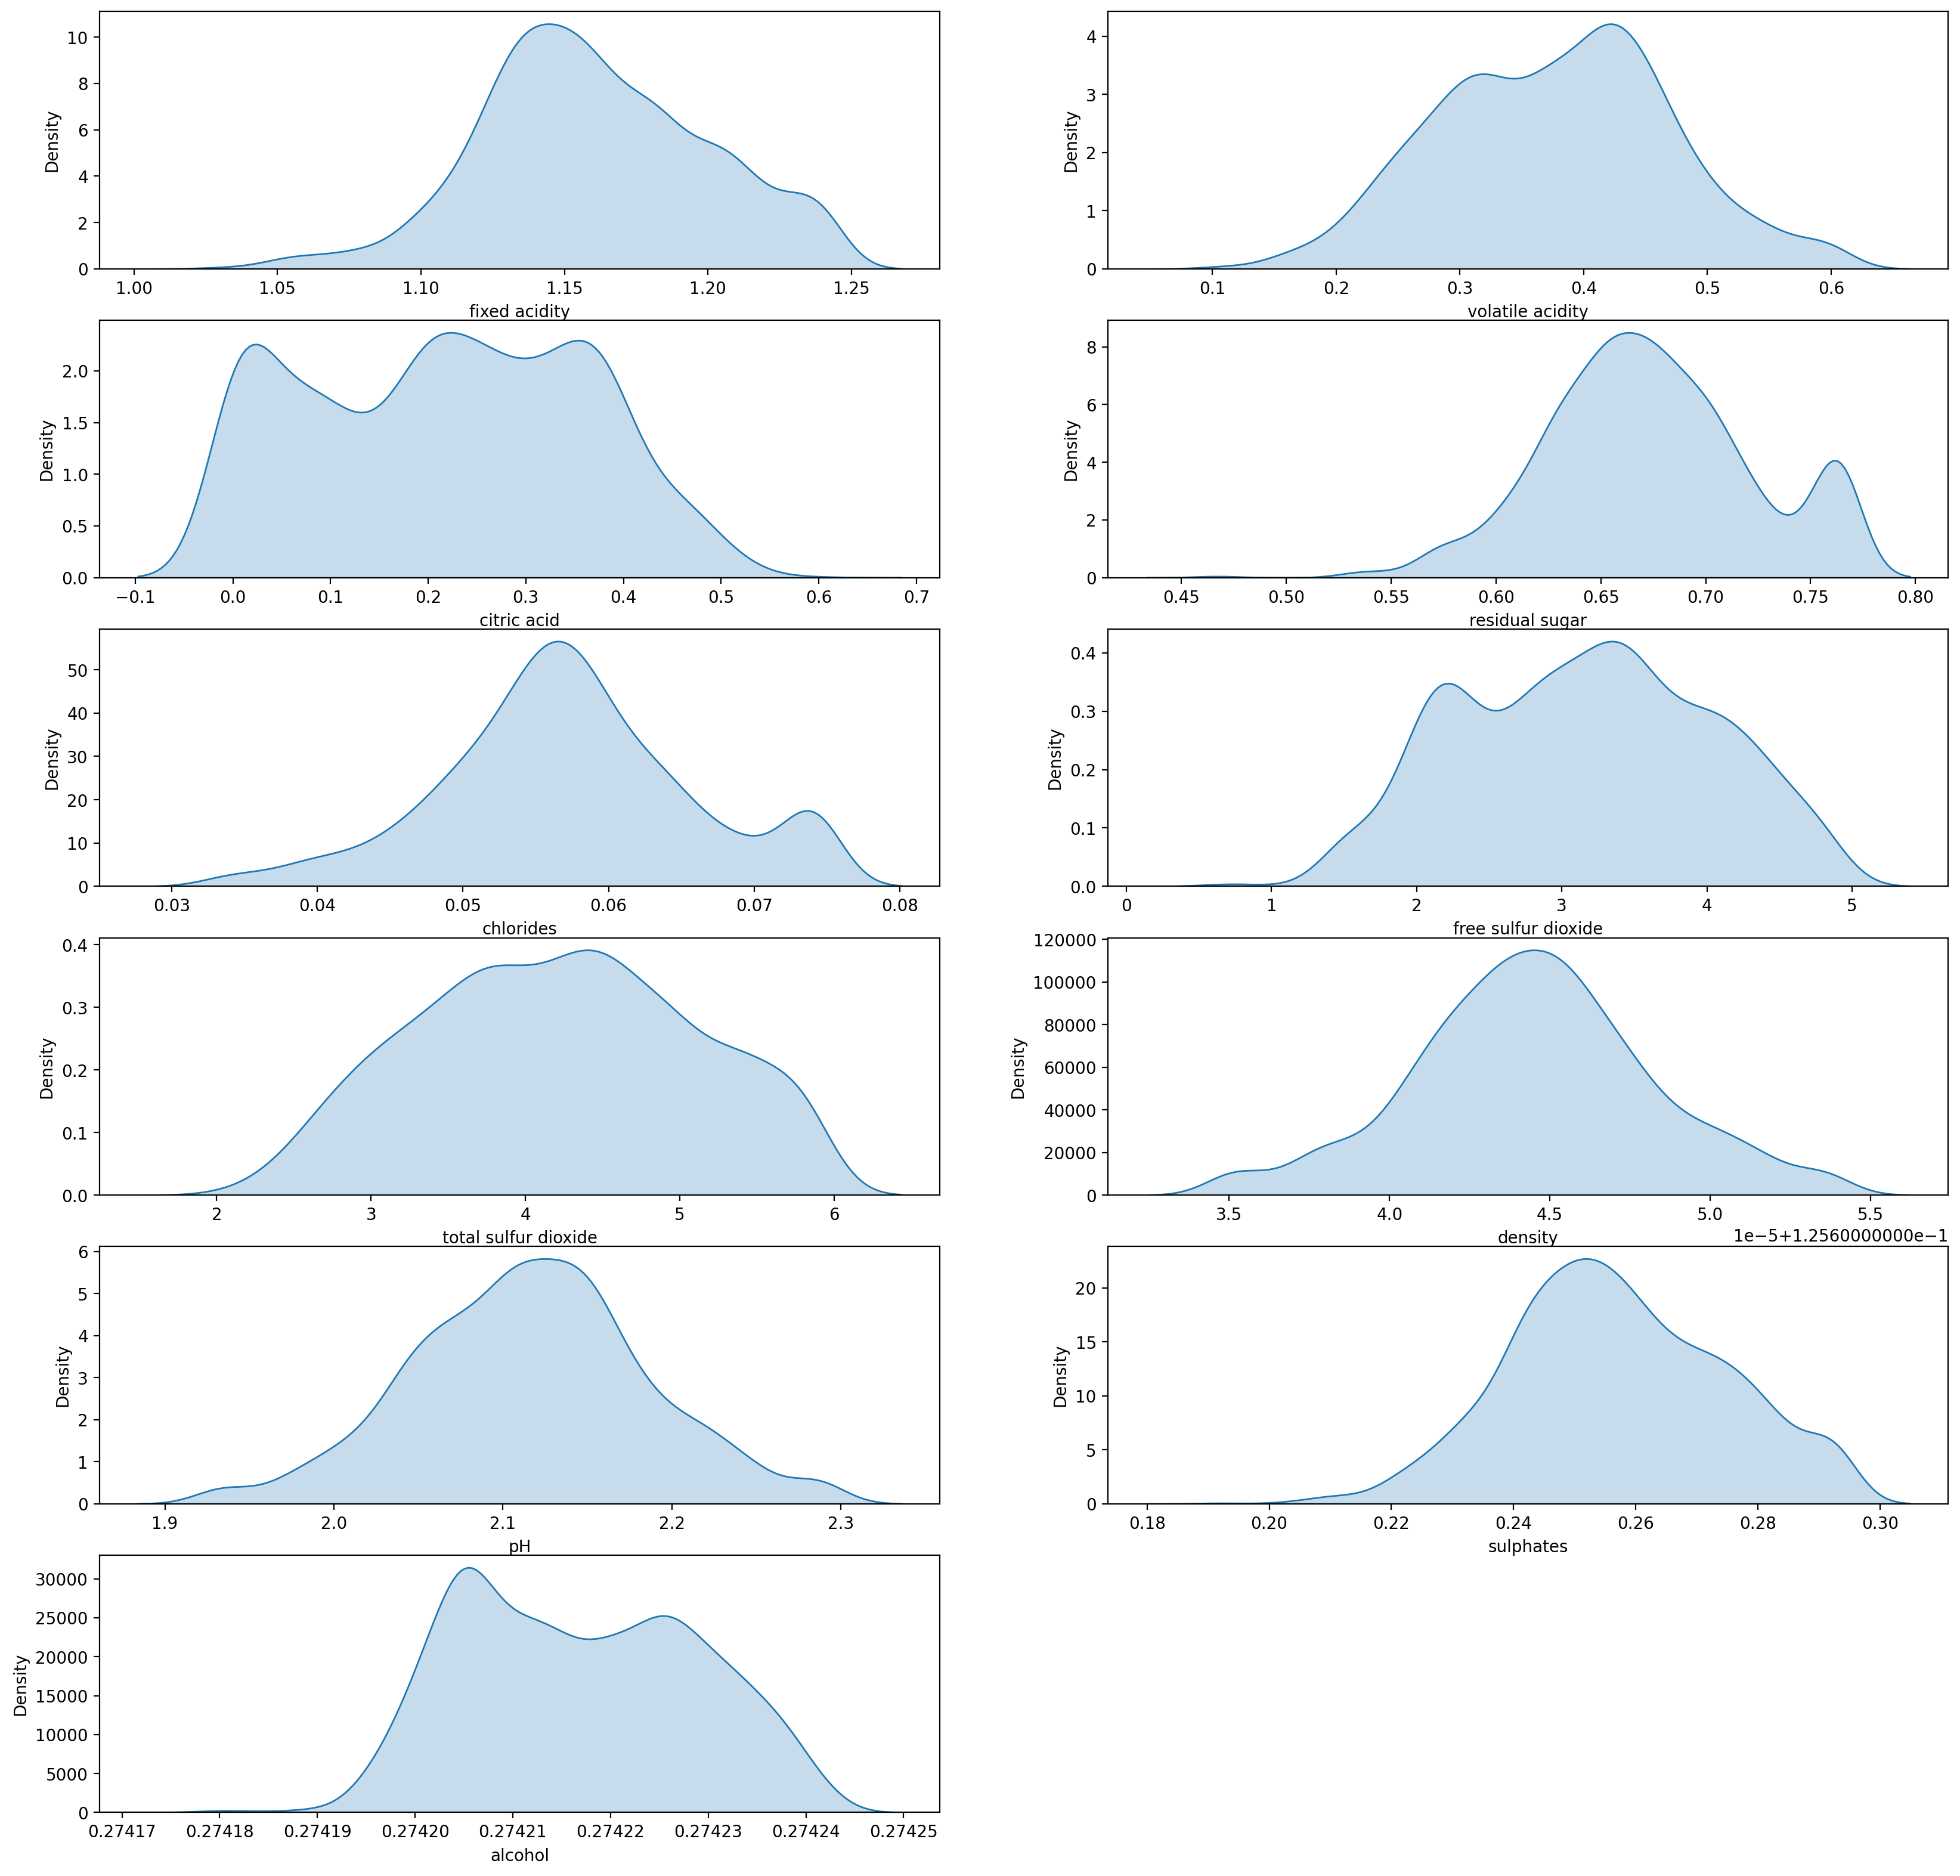

In [464]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns[:-1]:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.kdeplot(x=df[col], shade=True)

In [367]:
df.skew()

fixed acidity           0.009746
volatile acidity        0.006324
citric acid             0.017273
residual sugar          0.013309
chlorides               0.001513
free sulfur dioxide    -0.021458
total sulfur dioxide   -0.014384
density                 0.000000
pH                     -0.000040
sulphates               0.036120
alcohol                 0.111928
quality                 0.217802
dtype: float64

In [465]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [466]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.142552          0.471380     0.000000        0.641478   0.055275   
1       1.153779          0.548633     0.000000        0.704848   0.065600   
2       1.153779          0.498405     0.038981        0.681060   0.062970   
3       1.223609          0.233489     0.415107        0.641478   0.054758   
4       1.142552          0.471380     0.000000        0.641478   0.055275   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.918184              4.091326  0.125647  2.208906   0.246211   
1             4.029100              4.988125  0.125645  2.064731   0.263848   
2             3.318929              4.696616  0.125645  2.093057   0.259912   
3             3.487242              4.838275  0.125647  2.045729   0.249527   
4             2.918184              4.091326  0.125647  2.208906   0.246211   

    alcohol  quality  
0  0.274204        5  
1  0.274211        5  
2  0.274211        5  
3  0.274211        6  
4  0.274204        5

In [467]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [468]:
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(data=df.corr(), annot=True, cmap=plt.cm.afmhot_r)

<AxesSubplot:>

In [422]:
df.drop(axis=1, inplace=True, columns=['citric acid', 'density', 'free sulfur dioxide'])

# FEATURE SELECTION

In [469]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

In [470]:
X = df.drop(axis=1, columns='quality')
y= df.quality

In [471]:
skb_ = SelectKBest(k='all')

In [472]:
skb_.fit(X,y)

SelectKBest(k='all')

In [473]:
skb_.scores_

array([  5.12655186,  59.46572951,  19.21855948,   1.42445148,
        14.91972512,   6.20478459,  25.33700442,  13.71449406,
         4.41538552,  47.81917164, 111.21684103])

In [474]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Scaling

In [475]:
from sklearn.preprocessing import StandardScaler

In [476]:
sclaer = StandardScaler()

In [477]:
X_scaled = sclaer.fit_transform(X)

In [478]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10, test_size=0.2)

In [383]:
ros = SMOTETomek(sampling_strategy={3:1000,4:1000,5:1000,6:1000,7:1000,8:1000})

In [384]:
x_train, y_train = ros.fit_resample(x_train, y_train)

In [385]:
x_train.shape

(5984, 8)

# MODEL BUILDING

In [479]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [480]:
lr = LogisticRegression()

In [481]:
lr.fit(x_train, y_train)

LogisticRegression()

In [482]:
prediction = lr.predict(x_test)

In [483]:
accuracy_score(prediction, y_test)

0.578125

In [484]:
rfc = RandomForestClassifier()

In [485]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [486]:
prediction_rfc = rfc.predict(x_test)

In [487]:
accuracy_score(prediction_rfc, y_test)

0.646875

In [488]:
print(classification_report(prediction_rfc, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.80      0.72      0.76       146
           6       0.66      0.61      0.64       137
           7       0.43      0.53      0.47        34
           8       0.00      0.00      0.00         0

    accuracy                           0.65       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.69      0.65      0.67       320



In [489]:
svc = SVC()

In [490]:
svc.fit(x_train, y_train)

SVC()

In [491]:
prediction_svc = svc.predict(x_test)

In [492]:
accuracy_score(prediction_svc, y_test)

0.571875

In [493]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
prediction_knn = knn.predict(x_test)
accuracy_score(y_test, prediction_knn)

0.534375

In [494]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
prediction_xgb = xgb.predict(x_test)
accuracy_score(y_test, prediction_xgb)

[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:24:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metr

[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes,

[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=4
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[21:24:05] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, 

0.65625

# Let's use Randomized Search CV

In [495]:
from sklearn.model_selection import RandomizedSearchCV

In [496]:
params = {
    'learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'gamma':[0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7,0.8]
}

In [497]:
xgbcv = XGBClassifier()

In [498]:
rscv = RandomizedSearchCV(estimator=xgbcv, param_distributions=params, n_jobs=-1, cv=3, verbose=2, n_iter=100)
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gautam/Desktop/Ml/lib/python3.7/site-packages/xgboost/sklearn.py:

[21:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .colsample_bytree=0.7, gamma=0.5, learning_rate=0.1; total time=  11.9s
[21:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .colsample_bytree=0.3, gamma=0.5, learning_rate=0.1; total time=  10.0s
[21:18:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore t

[21:25:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[21:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .colsample_bytree=0.7, gamma=0.5, learning_rate=0.4; total time=  11.2s
[21:18:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .colsample_bytree=0.7, gamma=0.3, learning_rate=0.5; tot

[21:26:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 2 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 2 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 4 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 2 pruned nodes, max

[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 2 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 4 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 8 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 2 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 4 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 4 pruned nodes, max_depth=4
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 8 pruned node

[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 10 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 12 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 16 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 4 pruned nodes, max_depth=6
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 8 pruned nodes, max_depth=3
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 8 pruned nodes, max_depth=3
[21:28:32] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 22 pruned no

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [499]:
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [500]:
xgbcv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [501]:
xgbcv.fit(x_train, y_train)

[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 2 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 2 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 2 pruned nodes, max_depth=4
[21:29:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metr

[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 2 pruned nodes, max_depth=3
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 10 pruned nodes, max_depth=4
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 10 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 6 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 8 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 4 pruned nodes, max_depth=2
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 2 pruned nodes

[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 4 pruned nodes, max_depth=0
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 18 pruned nodes, max_depth=0
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 22 pruned nodes, max_depth=6
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 16 pruned nodes, max_depth=4
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 14 pruned nodes, max_depth=3
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 4 pruned nodes, max_depth=0
[21:29:09] INFO: /Users/runner/work/xgboost/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 4 pruned nodes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [502]:
pred = xgbcv.predict(x_test)

In [503]:
accuracy_score(pred, y_test)

0.653125